<a href="https://colab.research.google.com/github/max1nehour/Boosting-ML-in-AMR-Prediction/blob/main/Decision_Tree(Classification_of_e_faecium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/wulab_final

Mounted at /content/drive


# Set plot size

In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',10)

# Load Data Loop

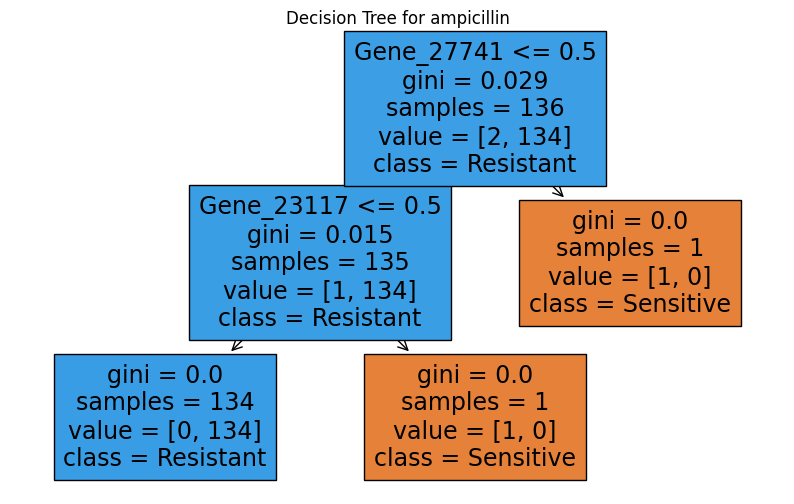

--------------------TRAIN REPORT: ampicillin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       134

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

--------------------TEST REPORT: ampicillin---------------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.99        33

    accuracy                           0.97        34
   macro avg       0.49      0.50      0.49        34
weighted avg       0.94      0.97      0.96        34

train_accuracy：1.0
test_accuracy：0.9705882352941176


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


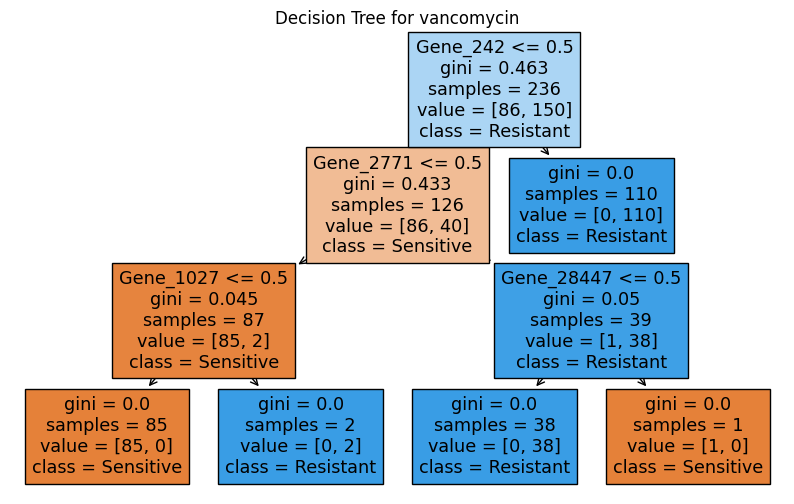

--------------------TRAIN REPORT: vancomycin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00       150

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236

--------------------TEST REPORT: vancomycin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        37

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

train_accuracy：1.0
test_accuracy：1.0


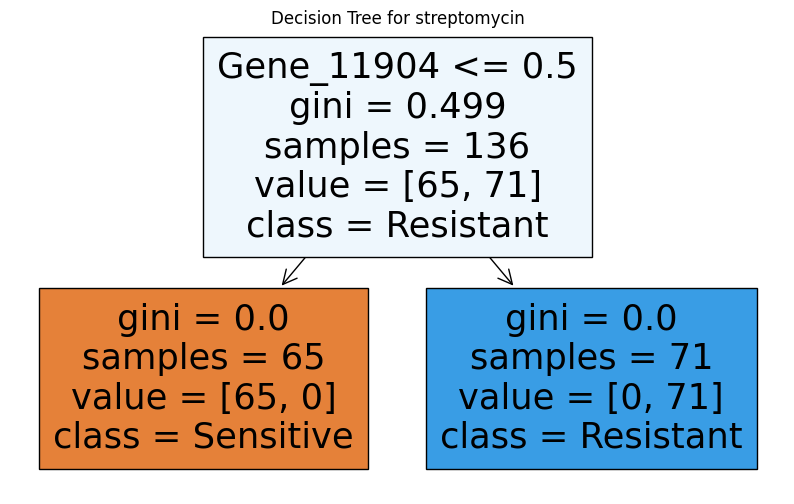

--------------------TRAIN REPORT: streptomycin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        71

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

--------------------TEST REPORT: streptomycin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

train_accuracy：1.0
test_accuracy：1.0


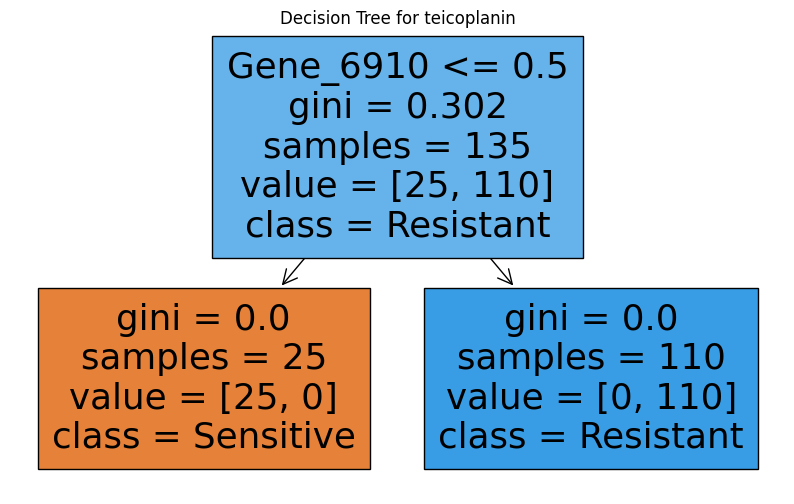

--------------------TRAIN REPORT: teicoplanin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00       110

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

--------------------TEST REPORT: teicoplanin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        28

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

train_accuracy：1.0
test_accuracy：1.0


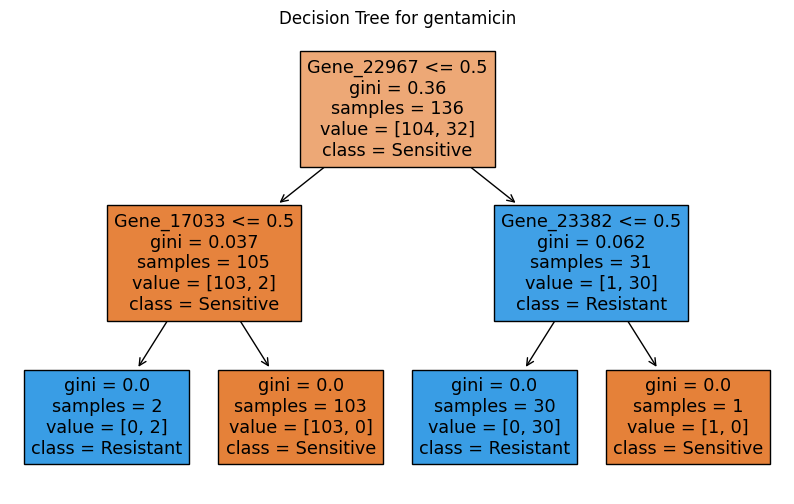

--------------------TRAIN REPORT: gentamicin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        32

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

--------------------TEST REPORT: gentamicin---------------------

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.88      0.88      0.88         8

    accuracy                           0.94        34
   macro avg       0.92      0.92      0.92        34
weighted avg       0.94      0.94      0.94        34

train_accuracy：1.0
test_accuracy：0.9411764705882353


In [ ]:
drugs = ['ampicillin','vancomycin','streptomycin','teicoplanin','gentamicin']

for i in drugs:
  drug = i
  if i =='vancomycin':
    header_ = 1
  else:
    header_ = 0
  antibiotics = pd.read_csv('/content/drive/MyDrive/wulab_final/{}1.csv'.format(i),header =header_,index_col =0,encoding = 'utf-8') #header=1讓第二行作為欄位抬頭
  antibiotics.replace('R',1, inplace = True)
  antibiotics.replace('S',0, inplace = True)

  df_data = pd.DataFrame(data= antibiotics)
  header_list = df_data.columns.tolist()

  #Define Input/ Output (array type)
  X = df_data.drop(labels=['Resistant'],axis=1).values
  y = df_data['Resistant'].values

  #Define Train/Test Set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify =y)

  #Fit
  from sklearn.tree import DecisionTreeClassifier
  model = DecisionTreeClassifier(max_depth=10 ,random_state=None)
  model.fit(X_train, y_train)
  test_predicted = model.predict(X_test)
  train_predicted = model.predict(X_train)

  from sklearn.tree import plot_tree
  import matplotlib.pyplot as plt

  # Print decision tree
  plt.figure(figsize=(10, 6))
  plot_tree(model, feature_names=df_data.columns[1:-1], class_names=['Sensitive', 'Resistant'], filled=True)
  plt.title('Decision Tree for {}'.format(drug))
  plt.show()


  #Evaluate
  from sklearn.metrics import accuracy_score, classification_report
  print('--------------------TRAIN REPORT: {}---------------------\n'.format(drug))
  print(classification_report(y_train,train_predicted))
  print('--------------------TEST REPORT: {}---------------------\n'.format(drug))
  print(classification_report(y_test,test_predicted))

  train_accuracy = model.score(X_train, y_train)
  test_accuracy = model.score(X_test, y_test)
  print(f"train_accuracy：{train_accuracy}")
  print(f"test_accuracy：{test_accuracy}")

